In [4]:
import numpy
import matplotlib.pyplot as plt
import math
import random
import scipy.integrate as integrate

sigma = 0.2
min = -0.6777792078491839, max = 0.6722619642943599, step = 0.0675020586071772
practical average: -0.0014932054419688004
practical variance: 0.039200910810301935
practical chi2: 15.284709270032112
practical: [6, 18, 50, 111, 247, 443, 675, 914, 1190, 1308, 1366, 1162, 947, 685, 442, 210, 140, 58, 20, 7]
theoretical: [7.880655581832372, 21.8611953854616, 54.17017058279019, 119.9018202753169, 237.06894026433903, 418.70712907619725, 660.5958277491493, 931.0081120915496, 1172.1011336225217, 1318.171486466214, 1324.2639995768345, 1188.428586150479, 952.7235192319265, 682.2676630132715, 436.45053185562966, 249.40505825707075, 127.31001380487562, 58.050169034280614, 23.64416801389793, 8.602401587678191]


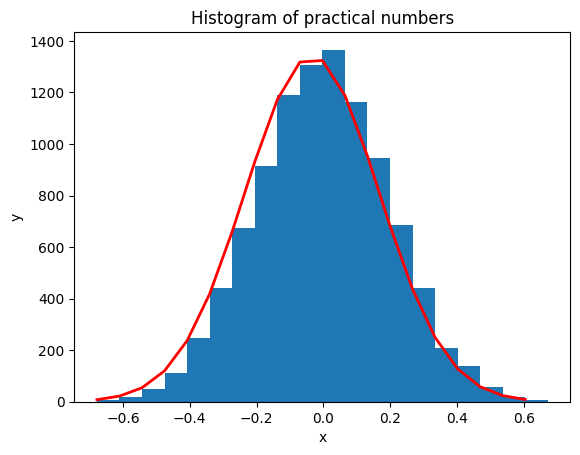

sigma = 0.5
min = -1.9261536302225035, max = 1.9319539598765099, step = 0.19290537950495068
practical average: 0.006301503546532082
practical variance: 0.24516277355353797
practical chi2: 22.01149675663091
practical: [2, 5, 20, 74, 147, 367, 602, 935, 1307, 1455, 1590, 1297, 984, 608, 343, 178, 53, 27, 4, 2]
theoretical: [2.0513926373183087, 7.689781832903332, 24.881297731534037, 69.49256555659423, 167.54104006643848, 348.68354734998206, 626.4370624801212, 971.5517870099708, 1300.7748418635476, 1503.4514707642354, 1500.1321949898852, 1292.1783336349524, 960.8739313422042, 616.8192237024949, 341.8154833860174, 163.51630838057426, 67.52390159978404, 24.06972947560542, 7.4061216204574185, 1.9669977265649994]


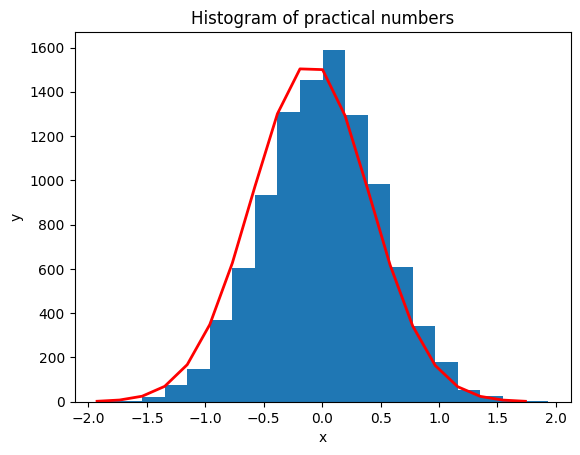

sigma = 1
min = -3.891196951930093, max = 3.711537022650159, step = 0.38013669872901257
practical average: -0.005414252747835684
practical variance: 0.9937817060504053
practical chi2: 26.394014775626278
practical: [1, 5, 26, 49, 123, 298, 590, 949, 1208, 1448, 1480, 1299, 1079, 692, 406, 200, 97, 29, 20, 1]
theoretical: [1.7328615125513198, 6.48125960584681, 21.013280776599018, 59.05799124626356, 143.88786701653513, 303.906140421806, 556.4579565380429, 883.302001117496, 1215.5560628082706, 1450.2175048770553, 1499.98038184727, 1345.0321617669874, 1045.6184247505107, 704.7004126664276, 411.7392999755, 208.55514032311623, 91.57841439111144, 34.86025000096804, 11.503321789817182, 3.290489317842799]


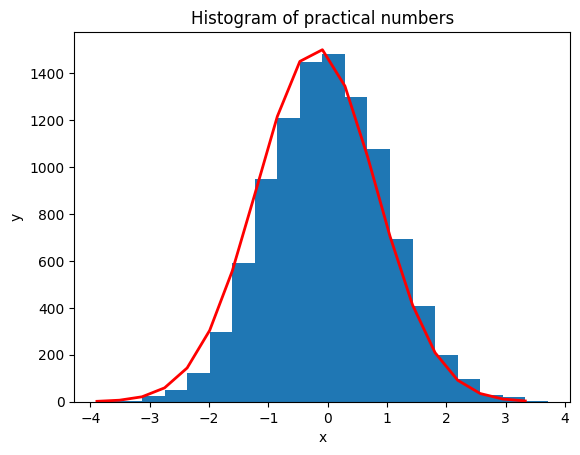

sigma = 2
min = -7.355799381771959, max = 6.956414678953102, step = 0.7156107030362531
practical average: -0.020509240209668298
practical variance: 3.912958911548684
practical chi2: 26.617499613653088
practical: [2, 14, 26, 75, 171, 358, 594, 881, 1124, 1343, 1419, 1339, 1031, 747, 499, 220, 93, 45, 14, 4]
theoretical: [3.323539678014101, 10.768699978327321, 30.738355664294406, 77.29656779603903, 171.24131022457908, 334.21916905360393, 574.6898632870204, 870.6008717431721, 1161.959900359973, 1366.31815159654, 1415.4756879854192, 1291.942358538805, 1038.8989712236369, 736.0228636001233, 459.4037320463782, 252.6268167251965, 122.38880533764777, 52.236731228640515, 19.641572477614478, 6.506322897551681]


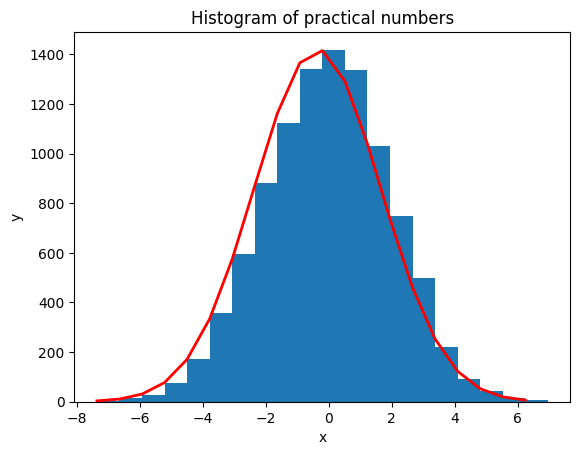

In [5]:
AMOUNT_OF_NUMS = 10000
STEPS = 20
SIGMAS = [0.2, 0.5, 1, 2]
ALPHA = 0

def mu():
    sum = 0.0
    for i in range(1, 13, 1):
        sum += random.random()
    
    return sum - 6

def gen_gausian_rand(amount, sigma, alpha):
    arr = []

    for _ in range(amount):
        arr.append(sigma * mu() + alpha)

    return arr


def gausian_theoretical(x, sigma, alpha):
    return math.exp(-((x - alpha) ** 2) / (2 * (sigma ** 2))) / (sigma * math.sqrt(2 * math.pi))


def gausian_theoretical_integrate(start, end, sigma, alpha):
    return integrate.quad(gausian_theoretical, start, end, args=(sigma, alpha))[0]


for sigma in SIGMAS:
    print(f'sigma = {sigma}')
    
    prac_nums = gen_gausian_rand(AMOUNT_OF_NUMS, sigma, ALPHA)

    min = numpy.min(prac_nums)
    max = numpy.max(prac_nums)
    step = (max - min) / STEPS

    x_steps = numpy.arange(min, max, step)

    print(f'min = {min}, max = {max}, step = {step}')

    # calculate histogram
    prac_hist = []
    for i in numpy.arange(min, max, step):
        count = 0
        for j in prac_nums:
            if j >= i and j < i + step:
                count += 1
        prac_hist.append(count)


    theor_hist = []
    for i in numpy.arange(min+step, max+step, step):
        theor_hist.append(gausian_theoretical_integrate(i-step, i, sigma, ALPHA) * AMOUNT_OF_NUMS)


    prac_average = numpy.average(prac_nums)
    print(f'practical average: {prac_average}')

    prac_variance = numpy.var(prac_nums)
    print(f'practical variance: {prac_variance}')

    prac_chi2 = 0
    for i in range(len(prac_hist)):
        prac_chi2 += ((prac_hist[i] - theor_hist[i]) ** 2) / theor_hist[i]
    print(f'practical chi2: {prac_chi2}')

    print(f'practical: {prac_hist}')
    print(f'theoretical: {theor_hist}')

    plt.hist(prac_nums, bins=STEPS)
    plt.plot(numpy.arange(min, max, step), theor_hist, linewidth=2, color='r')
    plt.title('Histogram of practical numbers')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()